In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


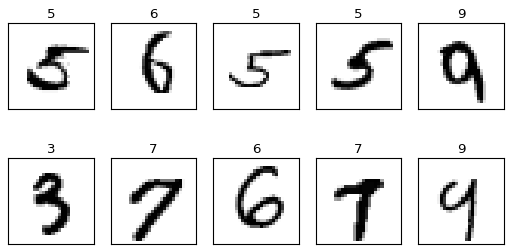

In [2]:
images, labels = mnist.train.next_batch(10)
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape(28,28), vmin=0, vmax=1, cmap=plt.cm.gray_r,interpolation="nearest")
#print images[0]
#print labels[0]

In [3]:
np.random.seed(20160604)
import tensorflow as tf
# Probability that a training image is categorized in a label
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

In [4]:
# Loss function (MLE)
t = tf.placeholder(tf.float32,[None, 10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [5]:
correct_prediction = tf.equal(tf.argmax(p,1),tf.argmax(t,1)) #argmax(M,1)= index of row // argmax(M,0)= index of column
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
i=0
for _ in range(2000):
    i = i + 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, t: batch_ts})
    if i%100 ==0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x: mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val,acc_val))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step: 100, Loss: 7561.629883, Accuracy: 0.839900
Step: 200, Loss: 5380.661133, Accuracy: 0.876200
Step: 300, Loss: 4564.908203, Accuracy: 0.887700
Step: 400, Loss: 4094.396973, Accuracy: 0.898000
Step: 500, Loss: 3796.523926, Accuracy: 0.902800
Step: 600, Loss: 3593.682129, Accuracy: 0.906600
Step: 700, Loss: 3458.674561, Accuracy: 0.909900
Step: 800, Loss: 3349.951416, Accuracy: 0.910200
Step: 900, Loss: 3258.486328, Accuracy: 0.914100
Step: 1000, Loss: 3184.140625, Accuracy: 0.912600
Step: 1100, Loss: 3136.323242, Accuracy: 0.912600
Step: 1200, Loss: 3053.820312, Accuracy: 0.916900
Step: 1300, Loss: 3013.065918, Accuracy: 0.916200
Step: 1400, Loss: 2991.081543, Accuracy: 0.918100
Step: 1500, Loss: 2974.719238, Accuracy: 0.918100
Step: 1600, Loss: 2956.619629, Accuracy: 0.916700
Step: 1700, Loss: 2920.771484, Accuracy: 0.919800
Step: 1800, Loss: 2903.385498, Accuracy: 0.918900
Step: 1900, Loss: 2887.197266, Accu

In [7]:
#sess2 = tf.InteractiveSession()
#sess2.run(tf.initialize_all_variables())
#i=0
#for _ in range(4000):
#    i = i + 1
#    batch_xs, batch_ts = mnist.train.images, mnist.train.labels
#    sess.run(train_step, feed_dict = {x: batch_xs, t: batch_ts})
#    if i%100 ==0:
#        loss_val, acc_val = sess.run([loss, accuracy],
#            feed_dict={x: mnist.test.images, t: mnist.test.labels})
#        print ('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val,acc_val))

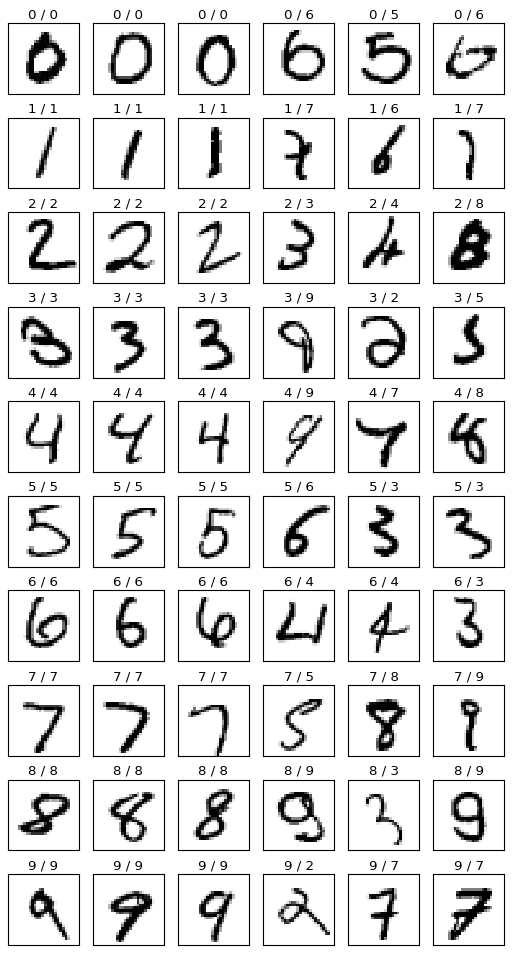

In [8]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c=1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c<4 and i ==actual) or (c>=4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' %(prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c>6:
                break
    

In [10]:
ww= sess.run(w)
ww0 = sess.run(w0)

(784, 10)